In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Fitness_Tracker_Data.csv")
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')  # Fix date format
df['Day_of_Week'] = df['Date'].dt.day_name()  # Add day of week

In [2]:
print(df.describe())  # Steps, heart rate, calories stats
print(df['Workout_Type'].value_counts())  # Counts per workout type

           User_ID                 Date        Steps  Heart_Rate_avg  \
count   100.000000                  100    100.00000      100.000000   
mean   4050.500000  2024-02-19 12:00:00   8455.22000       79.690000   
min    4001.000000  2024-01-01 00:00:00   1000.00000       61.000000   
25%    4025.750000  2024-01-25 18:00:00   4855.00000       70.000000   
50%    4050.500000  2024-02-19 12:00:00   8681.50000       80.000000   
75%    4075.250000  2024-03-15 06:00:00  11662.00000       89.000000   
max    4100.000000  2024-04-09 00:00:00  14972.00000       99.000000   
std      29.011492                  NaN   4157.31053       10.370602   

       Calories_Burned  
count       100.000000  
mean        473.640000  
min         160.000000  
25%         304.500000  
50%         488.500000  
75%         623.250000  
max         795.000000  
std         181.639588  
Workout_Type
Yoga        27
Cardio      26
Strength    26
Name: count, dtype: int64


Text(0.5, 1.0, 'Steps vs. Calories Burned by Workout Type')

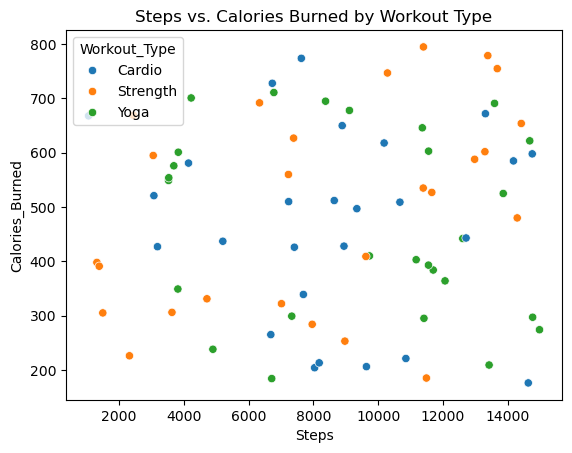

In [3]:
#1. Steps vs. Calories Burned 
sns.scatterplot(x='Steps', y='Calories_Burned', hue='Workout_Type', data=df)
plt.title("Steps vs. Calories Burned by Workout Type")

<Axes: xlabel='Workout_Type', ylabel='Heart_Rate_avg'>

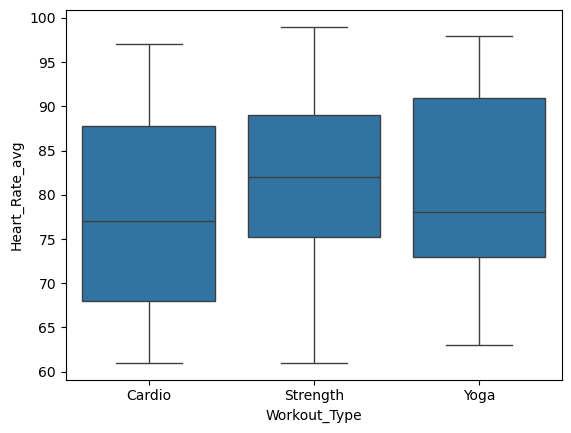

In [4]:
#2. Avg. Heart Rate by Workout Type
sns.boxplot(x='Workout_Type', y='Heart_Rate_avg', data=df)

<Axes: xlabel='Day_of_Week'>

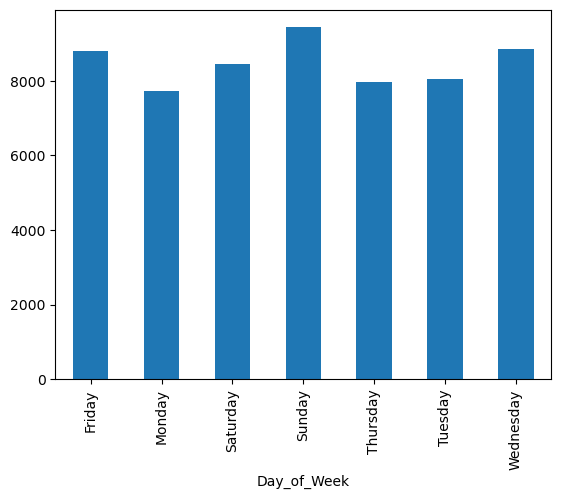

In [5]:
#3. Daily Trends
df.groupby('Day_of_Week')['Steps'].mean().plot(kind='bar')

<Axes: >

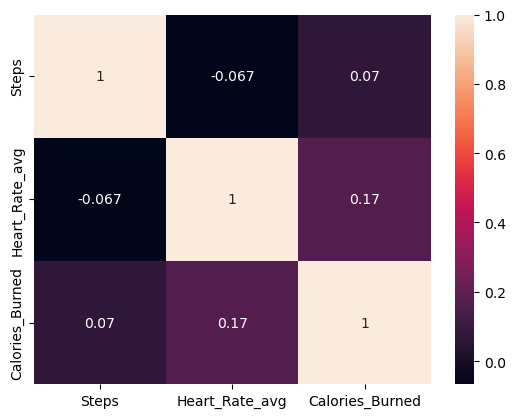

In [7]:
#4. Advanced Analysis \ Correlation Matrix
sns.heatmap(df[['Steps', 'Heart_Rate_avg', 'Calories_Burned']].corr(), annot=True)

<Axes: xlabel='Steps'>

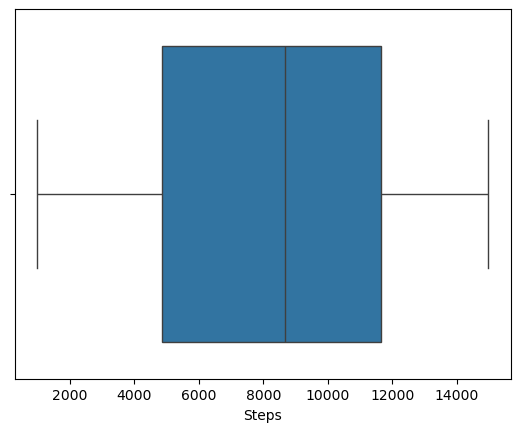

In [8]:
#5, Outlier Detection
sns.boxplot(x=df['Steps'])  # Identify unusually low/high step counts.

In [10]:
#6. Workout Efficiency Matrix 
df['Calories_per_Step'] = df['Calories_Burned'] / df['Steps']
df.groupby('Workout_Type')['Calories_per_Step'].mean()

Workout_Type
Cardio      0.084144
Strength    0.094598
Yoga        0.066327
Name: Calories_per_Step, dtype: float64